<a href="https://colab.research.google.com/github/Haender-Michael/Haender_practice/blob/main/new_baby.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Risk Assessment: Analysis for best Aicraft Acquisition.

##Introduction
For this analysis, we will use the dataset  **"Aviation Accident Database & Synopses, up to 2023"** from Kaggle, provided by the National Transportation Safety Board (NTSB). This dataset contains comprehensive information about aviation incidents.

Our goal is to analyze accident patterns, aircraft reliability, evolution of accident frequency in aviation incidents. We will generate data-driven insights that will help the new aviation division in identifying the safest aircrafts for purchase and determining the best strategies for fleet management.




##Dataset overview
- Aircraft Makes and Models: Information about the specific make and model of the aircraft involved in each incident.
- Event date : the specific date each incident happened.
- location : The location where the aviation accident took place.
- injury severity: the Gravity and the amount of injuries.
- Aircraft Damage : the state of Aircrafts after accident.
- weather conditions

the dataset also contains other information, that are less relevant to the analysis.


##### N.B: the dataset is not up to date. Any analysis conducted will only be representative of the approximate year range from 1982 to 2023.

## Exploratory Data Analysis (EDA)
For the purpose of this analysis we will take the following steps:
- Data cleaning
- Data Understanding
- Data Analysis
- Recommendations
- Summary


In [282]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

In [283]:
df = pd.read_csv('./Aviation_Data.csv', encoding='latin1', low_memory=False)


###Data cleaning.
In this part we will:
- Create a copy of the DataFrame.
- drop columns.
- modify data type in entries and set Index.
- fill rows with missing values.

these steps will ensure that everything run smoothly later during our Analysis.
Some other data clearing process will also be done later.

#### Create a copy of the DataFrame.

In [284]:
# First let's get a quick view of the DataFrame.
df.sample(5)

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
53066,20020731X01260,Accident,NYC02LA141A,2002-07-17,"DAYTON, OH",United States,39.683333,-84.245833,I73,Moraine Airpark,...,Personal,NaN,NaN,NaN,3.0,1.0,VMC,Landing,Probable Cause,25-11-2003
72670,20120908X82232,Accident,WPR12LA407,2012-09-08,"Borrego Springs, CA",United States,331538N,1161928W,L08,Borrego Valley Airport,...,Personal,MOORE EDWARD R,1.0,0.0,0.0,0.0,VMC,NaN,The pilotÂs inability to maintain control of ...,25-09-2020
74505,20130930X03809,Accident,ERA13CA435,2013-09-30,"Thomaston, GA",United States,325730N,0841625W,NaN,NaN,...,Personal,NaN,0.0,2.0,0.0,0.0,VMC,NaN,The pilot's inadequate pre-flight planning and...,25-09-2020
48078,20001212X20725,Accident,NYC00LA103,2000-03-28,"RENICK, WV",United States,NaN,NaN,LBW,GREENBRIER VALLEY AIRPORT,...,Business,NaN,0.0,1.0,0.0,0.0,IMC,Cruise,Probable Cause,08-05-2001
4787,20001214X43114,Accident,NYC83FA125,1983-05-26,"HAINES FALLS, NY",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,0.0,0.0,0.0,VMC,Cruise,Probable Cause,NaN


In [285]:
# let's get some insights about how the data is structured .
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90348 entries, 0 to 90347
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      90348 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50132 non-null  object 
 9   Airport.Name            52704 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87507 non-null  object 
 14  Make                    88826 non-null

In [286]:
# Create a copy to preserve the original DataFrame.
df2 = df.copy()
# from now on we will be working with the copy "df2".

In [287]:
# removing unnecessary space in column names for easier access:
df2.columns = df2.columns.str.strip()


In [288]:
# replace "."by "_" in column names for better readability and accessibility.
df2.columns = df2.columns.str.replace('.','_')

#### Drop columns :
Below we will drop columns that are not
needed for the analysis or that doesn't contain a substantial amount of non-null values.





In [289]:
# Event_Id will later be set as Index, so Accident_Number and Registration_Number are unnecessary.
# Injury_Severity only summarizes the three injury level columns,it is not required.
# Publication_Date is not needed for this analysis.

df2 = df2.drop(columns =['Registration_Number','Accident_Number','Publication_Date','Injury_Severity'])

In [290]:
# let's take a look at how much missing values each column contains:
missing_values_count = df2.isna().sum()
missing_values_count

,0
Event_Id,1459
Investigation_Type,0
Event_Date,1459
Location,1511
Country,1685
Latitude,55966
Longitude,55975
Airport_Code,40216
Airport_Name,37644
Aircraft_damage,4653


In [291]:
# Keep only columns with acceptable missing values.
df2 = df2.loc[:, missing_values_count <= 50000]

#### Modify data type in entries and set index.
- set index.
- reformat column type.

In [292]:
# Make each row in the Event_Id unique and Set index as Event_Id.
df2 = df2.drop_duplicates(subset = ['Event_Id'])
df2.set_index('Event_Id',inplace=True)

In [293]:
# Reformating rows in Event_date to date format:
df2['Event_Date'] = pd.to_datetime(df2['Event_Date'])

In [294]:
# Let's convert the 5 columns :
# Total_Fatal_Injuries,Total_Serious_Injuries,Total_Minor_Injuries, Total_Uninjured ,Number_of_Engines
# into intengers
df2[['Total_Fatal_Injuries','Number_of_Engines','Total_Serious_Injuries', 'Total_Minor_Injuries', 'Total_Uninjured']] = (
    df2[['Total_Fatal_Injuries', 'Number_of_Engines','Total_Serious_Injuries', 'Total_Minor_Injuries', 'Total_Uninjured']]
    .fillna(0)
    .astype(int)
)

#### Fill rows with missing values:
In this section we will fill rows that have missing information and also convert the data in each row to lowercase.

Dropping rows with missing values won't be necessary in the context of this Analysis; since the columns  with missing values we will deal with,later in the Analysis, only contain categorical data.

In [295]:
# Since we have some columns with categorical data that have missing rows
# we can just replace the Null with "unknown".
categorical_data = []

for column in df2.columns:
    if df2[column].dtype == 'object':
        categorical_data.append(column)

print(categorical_data)


['Investigation_Type', 'Location', 'Country', 'Airport_Code', 'Airport_Name', 'Aircraft_damage', 'Make', 'Model', 'Amateur_Built', 'Engine_Type', 'Purpose_of_flight', 'Weather_Condition', 'Broad_phase_of_flight', 'Report_Status']


In [296]:
# now let's replace all of the Null value with 'unknown':
df2[categorical_data] = df2[categorical_data].applymap(
    lambda x: 'unknown' if pd.isna(x) else x
)
df2.sample(5)


<ipython-input-296-540267254>:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df2[categorical_data] = df2[categorical_data].applymap(


,Investigation_Type,Event_Date,Location,Country,Airport_Code,Airport_Name,Aircraft_damage,Make,Model,Amateur_Built,Number_of_Engines,Engine_Type,Purpose_of_flight,Total_Fatal_Injuries,Total_Serious_Injuries,Total_Minor_Injuries,Total_Uninjured,Weather_Condition,Broad_phase_of_flight,Report_Status
Event_Id,,,,,,,,,,,,,,,,,,,,
20210614103256,Accident,2021-06-07,"Kolkata, India",India,unknown,unknown,unknown,BOEING,737,No,0,unknown,unknown,0,1,2,111,unknown,unknown,unknown
20001213X34896,Accident,1986-10-18,"CHICKALOON FLAT, AK",United States,unknown,unknown,Substantial,Taylorcraft,BC-12D,No,1,Reciprocating,Personal,0,1,0,0,VMC,Landing,Probable Cause
20001213X27272,Accident,1988-11-05,"MADERA, CA",United States,MAE,MADERA MUNI,Substantial,Cessna,150,No,1,Reciprocating,Personal,0,0,0,1,VMC,Landing,Probable Cause
20030617X00890,Accident,2003-05-31,"INYOKERN, CA",United States,KIYK,Inyokern,Substantial,Beech,35-B33,No,1,Reciprocating,Personal,0,0,0,4,VMC,Landing,Probable Cause
20100908X65424,Accident,2010-09-07,"Winters, CA",United States,PVT,PVT Helipad,Substantial,AEROSPATIALE,SA315,No,1,Turbo Shaft,Aerial Application,0,0,0,1,VMC,unknown,A loss of engine power for reasons that could ...


In [297]:
# Convert all entries to lowercase so that unique values does not appear many times.
df2[categorical_data] = df2[categorical_data].apply(lambda x: x.str.lower())


In [298]:
# Verify if everithing have been adjusted.
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 87952 entries, 20001218X45444 to 20221230106513
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Investigation_Type      87952 non-null  object        
 1   Event_Date              87951 non-null  datetime64[ns]
 2   Location                87952 non-null  object        
 3   Country                 87952 non-null  object        
 4   Airport_Code            87952 non-null  object        
 5   Airport_Name            87952 non-null  object        
 6   Aircraft_damage         87952 non-null  object        
 7   Make                    87952 non-null  object        
 8   Model                   87952 non-null  object        
 9   Amateur_Built           87952 non-null  object        
 10  Number_of_Engines       87952 non-null  int64         
 11  Engine_Type             87952 non-null  object        
 12  Purpose_of_flight       87952

## Data Understanding:
This section ensures that the data is properly structured and prepared for analysis, laying a solid foundation for meaningful insights. It sets the framework for the upcoming exploration.


Below are key questions that the new aviation division may seek to answer. They will be addressed in the notebook.
- Which aircraft makes have suffered the fewest and the most accidents?
- How has accident frequency evolved over the years for the country with the highest number of accidents?
- For which flight purposes have accidents been most frequent?
- For which flight phases have accidents been most frequent?
- For which Weather conditions have accidents been most frequent?
- How resistant are certain aircraft to accidents for Top Manufacturers ?
- How well are passengers protected in the event of an aircraft crash For top Aircraft Manufacturers?


In [299]:
# let's get some insights about how the data is structured after cleaning.
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 87952 entries, 20001218X45444 to 20221230106513
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Investigation_Type      87952 non-null  object        
 1   Event_Date              87951 non-null  datetime64[ns]
 2   Location                87952 non-null  object        
 3   Country                 87952 non-null  object        
 4   Airport_Code            87952 non-null  object        
 5   Airport_Name            87952 non-null  object        
 6   Aircraft_damage         87952 non-null  object        
 7   Make                    87952 non-null  object        
 8   Model                   87952 non-null  object        
 9   Amateur_Built           87952 non-null  object        
 10  Number_of_Engines       87952 non-null  int64         
 11  Engine_Type             87952 non-null  object        
 12  Purpose_of_flight       87952

In [300]:
df2.describe()

,Event_Date,Number_of_Engines,Total_Fatal_Injuries,Total_Serious_Injuries,Total_Minor_Injuries,Total_Uninjured
count,87951,87952.000000,87952.000000,87952.000000,87952.000000,87952.000000
mean,1999-10-09 03:15:27.475526272,1.066172,0.552415,0.241245,0.308407,4.747499
min,1948-10-24 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1989-02-04 00:00:00,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1998-08-07 00:00:00,1.000000,0.000000,0.000000,0.000000,1.000000
75%,2009-07-30 00:00:00,1.000000,0.000000,0.000000,0.000000,2.000000
max,2022-12-29 00:00:00,8.000000,349.000000,161.000000,380.000000,699.000000
std,NaN,0.516280,4.957025,1.440324,2.086741,25.763412


Now that we have:
> - An overview of the data after cleaning
> - Detected missing values
> - Reviewed basic statistics
> - Conducted initial visualizations

We are ready to proceed with the analysis.


## Data Analysis
In this part:

- Visualization
- Correlational Analysis
- Pattern Recognition
- Trend Identification
- Insights and Findings
- risk assessment



### Which aircraft makes have suffered the fewest and the most accidents?
To address this question a bar chart of the top 5 Aircraft Makes that have suffered the most accidents and the 5 that have suffered the fewest will be provided.


In [301]:
df2['Make'].head(5)

,Make
Event_Id,
20001218X45444,stinson
20001218X45447,piper
20061025X01555,cessna
20001218X45448,rockwell
20041105X01764,cessna


In [302]:
df2['Make'].value_counts() # to get an overview of the different Aircraft make.

,count
Make,
cessna,26839
piper,14744
beech,5332
bell,2706
boeing,2652
...,...
eclipse aerospace inc,1
pipistrel d o o,1
mulholland robert a,1


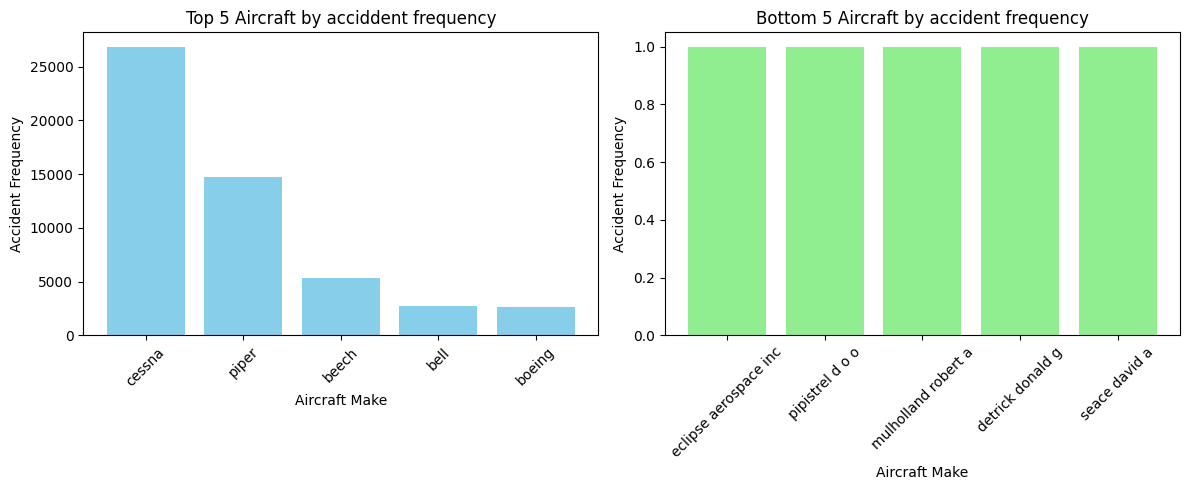

In [303]:
# We will graph in one figure the top 5 most recurrent Aircrafts and the least 5 recurrent for the aviation accident DataFrame.

# Retrieve top and least recurrent aircraft makes.
most_recurrent = df2['Make'].value_counts().head(5)
least_recurrent = df2['Make'].value_counts().tail(5)

# Create figure and subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot the most recurrent aircraft
axes[0].bar(most_recurrent.index, most_recurrent.values, color='skyblue')
axes[0].set_title('Top 5 Aircraft by acciddent frequency')
axes[0].set_xlabel('Aircraft Make')
axes[0].set_ylabel('Accident Frequency')
axes[0].tick_params(axis='x', rotation=45)

# Plot the least recurrent aircraft
axes[1].bar(least_recurrent.index, least_recurrent.values, color='lightgreen')
axes[1].set_title('Bottom 5 Aircraft by accident frequency')
axes[1].set_xlabel('Aircraft Make')
axes[1].set_ylabel('Accident Frequency')
axes[1].tick_params(axis='x', rotation=45)

# Adjust layout and display
plt.tight_layout()



#### Analysis :
Now, we might mistakenly believe that the least recurrent aircraft are the safest, but that's not necessarily true. The fact that these aircraft have fewer recorded accidents could simply mean that they have operated fewer flights, reducing their chances of incidents rather than proving their reliability.

For example, if the aircraft make Cessna has the most accidents, it might simply indicate that it has operated the most flights. However, when analyzing accident rates, it could actually be among the most reliable aircraft in terms of avoiding accidents.

Only by comparing accident rates  instead of frequency can we determine which aircraft make could be considered the most reliable.






### How has accident frequency evolved over the years for the country with the highest number of accidents?
The new aviation division would want this information to :
- Evaluate safety trends --> Assess whether accident rates have decreased due to improved regulations and technology.

- Improve fleet management --> Make informed decisions about aircraft acquisition based on reliability across regions.

- Support policy decisions --> Use data-driven insights to enhance aviation safety measures and operational guidelines.

- Identify high-risk regions



In [304]:
# let's add a column 'Event_Year' to the DataFrame:
df2['Event_Year'] = df2['Event_Date'].apply(lambda x: str(x)[:4])


#### The top 4 countries with the most aviation accidents will be represented in the plot below.

<ipython-input-305-3302931985>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["Event_Year"] = df2["Event_Year"].astype(int)


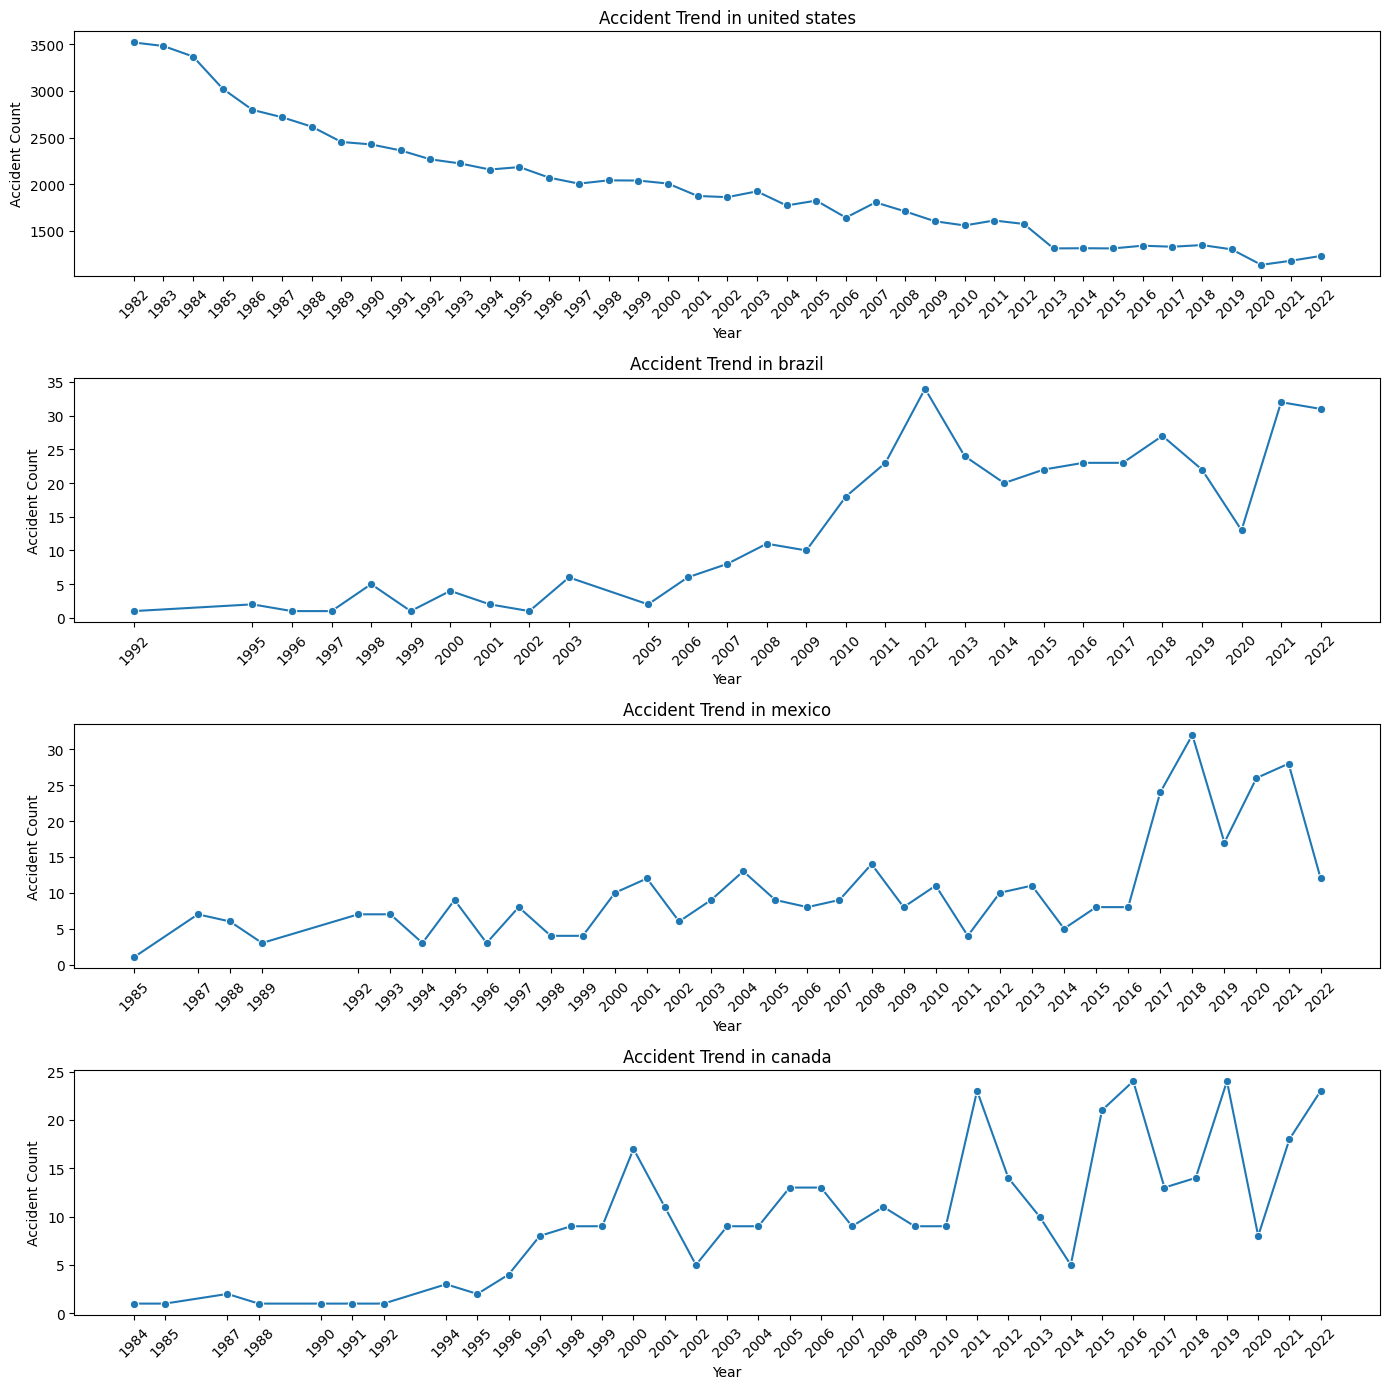

In [305]:
# Convert "Event_Year" to integer format
    # First df2 has a row with a null value let's remove it.
df2= df2.dropna()
df2["Event_Year"] = df2["Event_Year"].astype(int)

# Get the top 4 countries  with the most accidents (excluding "UNKNOWN")
most_affected_countries = df2["Country"].value_counts().head(5).index.tolist()
most_affected_countries = [country for country in most_affected_countries if country != "UNKNOWN"]

# Filter DataFrame to start from 1982 or the earliest registered year for each country.
filtered_data = df2[df2["Event_Year"] >= 1982]

# Aggregate accident frequencies per year for each country
accident_trends = filtered_data.groupby(["Event_Year", "Country"]).size().reset_index(name="Accident_Count")


fig, axes = plt.subplots(4, 1, figsize=(14, 14))

# We will Loop through the first 4 most affected countries and plot accident trends
for i, country in enumerate(most_affected_countries[:4]):
    country_accidents = accident_trends[accident_trends["Country"] == country]

    sns.lineplot(data=country_accidents, x="Event_Year", y="Accident_Count", ax=axes[i], marker='o')
    axes[i].set_title(f"Accident Trend in {country}")
    axes[i].set_xlabel("Year")
    axes[i].set_ylabel("Accident Count")

    # Ensure consistent x-axis formatting across all graphs
    axes[i].set_xticks(sorted(country_accidents["Event_Year"].unique()))
    axes[i].tick_params(axis='x', rotation=45)

# Improve spacing for clear visualization
plt.tight_layout()









### Analysis:
The head of the new aviation division may need to reconsider or conduct further research before initiating airplane operations in countries such as Canada and Mexico due to the increase in aviation accident frequency observed between 2020 and 2022.

However, since the dataset is not up to date,it's not safe to assume that it is still the case for years after 2022.

Additional analysis should be done, as significant changes in aviation trends may occur in the years after 2022.

###For which flight purposes have accidents been most frequent?

Text(0, 0.5, 'Number of Accidents')

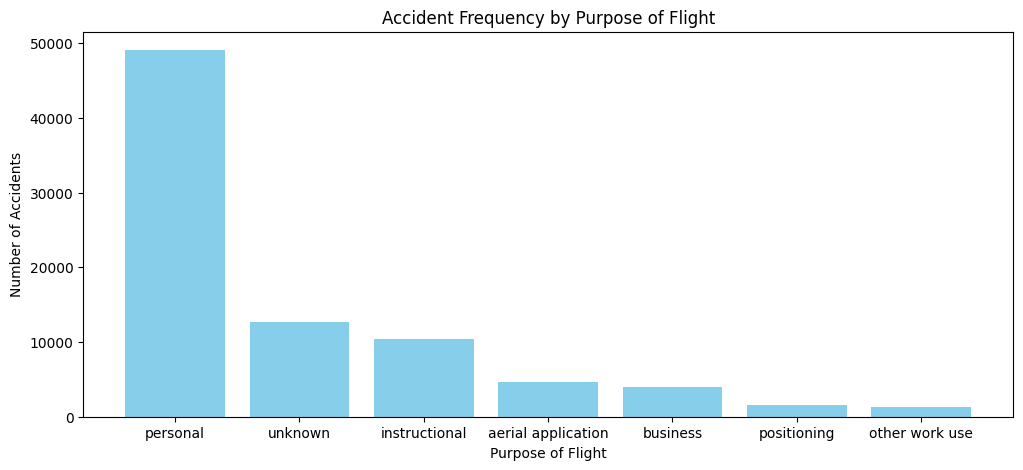

In [306]:
# Remove "unknown" rows (temporarily) from the column :

purpose_of_flight = df2["Purpose_of_flight"].value_counts().head(7)

fig, ax = plt.subplots(figsize=(12, 5))

# Plot bar chart
ax.bar(purpose_of_flight.index, purpose_of_flight.values, color= "skyblue")
ax.set_title("Accident Frequency by Purpose of Flight")
ax.set_xlabel("Purpose of Flight")
ax.set_ylabel("Number of Accidents")




#### Analysis:
N.B: This graph does not show which purpose of flight is most likely to cause an accident. It only presents accident frequency by purpose, not accident rates.

For example, personal flights may have the highest accident count simply because they account for more aircraft operations overall.


The frequency of Aircraft accident for personal purpose of flight may prompt the head of the new aviation division to take specific measures of safety regarding the personal or other very recurrent flight purposes, but it should not be assumed that higher frequency directly correlates with a higher accident rate.

 ### For which flight phases have accidents been most frequent?

Text(0, 0.5, 'Number of accidents')

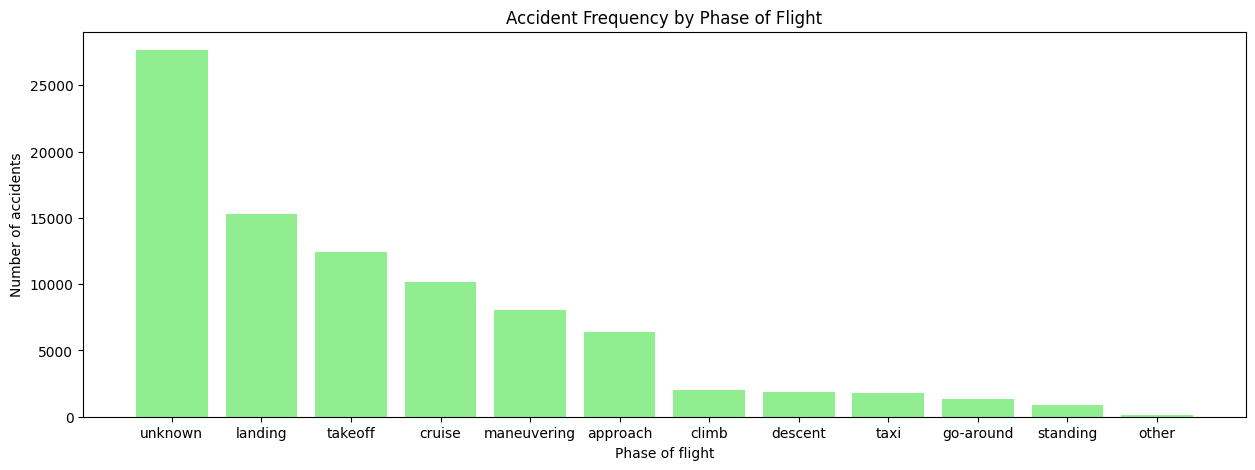

In [307]:
Broad_phase_of_flight= df2['Broad_phase_of_flight'].value_counts()
fig,ax = plt.subplots(figsize=(15,5))
ax.bar(Broad_phase_of_flight.index,Broad_phase_of_flight.values, color = "Lightgreen")
ax.set_title('Accident Frequency by Phase of Flight')
ax.set_xlabel('Phase of flight')
ax.set_ylabel('Number of accidents')

### For which weather condition have accidents been most frequent?

In [308]:
# let's take a look at the unique weather conditions
df2['Weather_Condition'].value_counts()


,count
Weather_Condition,
vmc,76417
imc,5949
unknown,4473
unk,1112


In [309]:
# let's Replace "unknown" to "unk"
df2['Weather_Condition'] = df2['Weather_Condition'].replace("unknown","unk")
df2['Weather_Condition'].value_counts()

,count
Weather_Condition,
vmc,76417
imc,5949
unk,5585


In [310]:
# percentage of accident that happens during unfavorable weather conditions:
percentage = (5949 / 76417)* 100
percentage

7.784916968737322

Text(0, 0.5, 'Number of accidents')

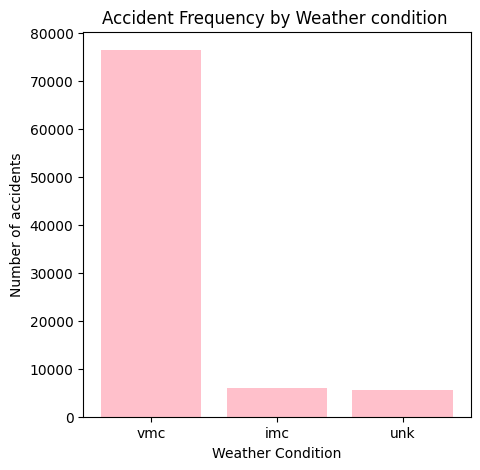

In [311]:
Weather_Condition = df2['Weather_Condition'].value_counts()
fig,ax = plt.subplots(figsize=(5,5))
ax.bar(Weather_Condition.index,Weather_Condition.values, color = "pink")
ax.set_title('Accident Frequency by Weather condition ')
ax.set_xlabel('Weather Condition')
ax.set_ylabel('Number of accidents')

Visual Meteorological Conditions(*VMC*):Weather conditions that allow pilots to fly using visual references rather than relying on instruments.
Instrument Meteorological Conditions(*IMC):This usually indicates that the weather condition was not recorded or is uncertain in aviation reports.

Most accidents happen during favorable weather conditions.
Regardless, Measures should be taken to avoid accidents that are directly due to bad weather condition as they account for around 8 percent.

### How resistant are certain aircrafts to accidents for Top Manufacrtures ?

Top Aircraft Manufacturers:

With a market valuation of over \$114.97 billion as of 2024, Airbus dominates the aircraft manufacturing industry, closely followed by Boeing at \$113.82 billion. Other notable players include Lockheed Martin (\$110.98 billion), Hindustan Aeronautics (\$42.80 billion), Textron (\$16.35 billion), Dassault Aviation (\$14.18 billion), Bombardier (\$6.26 billion), Embraer (\$4.82 billion), Joby Aviation (\$3.51 billion), and Korea Aerospace Industries (\$3.45 billion). These organizations produce both military and commercial aircraft and provide necessary services, including component manufacturing, maintenance, and repairs. (source:https://straitsresearch.com/statistic/largest-aircraft-manufacturers-globally)


> ### Why are we using the top aircraft manufacturers for this analysis?

 >The top aircraft manufacturers are highly recognized and trusted in the aviation industry. Their market valuation serves as proof of their reliability and effectiveness. For instance, Airbus and Boeing are widely regarded as industry leaders in safety and innovation.

In [312]:
# Let's take a look at the Aircraft_damage unique values first.
df2['Aircraft_damage'].value_counts(5)

,proportion
Aircraft_damage,
substantial,0.723596
destroyed,0.209230
unknown,0.036634
minor,0.030540


In [313]:
# create new column Aircraft make combine with aircraft model.
df2['make_model']= df2['Make'] +' ' + df2['Model']

In [314]:
df2['make_model']


,make_model
Event_Id,
20001218X45444,stinson 108-3
20001218X45447,piper pa24-180
20061025X01555,cessna 172m
20001218X45448,rockwell 112
20041105X01764,cessna 501
...,...
20221227106491,piper pa-28-151
20221227106494,bellanca 7eca
20221227106497,american champion aircraft 8gcbc


In [315]:
# Select relevant columns
df_new = df2[['make_model']]

# Define the list of manufacturers in lowercase
top_aircraft_Manufacturers = [
    'airbus', 'boeing', 'lockheed', 'hindustan', 'textron',
    'dassault', 'bombardier', 'joby', 'aerospace'
]

# Extract the first word from 'make_model'
df_new['First_Word'] = df_new['make_model'].str.split().str[0]

# Filter dataset by the first word in 'make_model'
filtered_df2 = df_new[df_new['First_Word'].isin(top_aircraft_Manufacturers)]

print(filtered_df2)






                                  make_model First_Word
Event_Id                                               
20020917X02242                    boeing a75     boeing
20020917X01897               lockheed l-1011   lockheed
20020917X01907                boeing 737-222     boeing
20020917X02585                  boeing a75n1     boeing
20020917X02336               boeing b737-2h4     boeing
...                                      ...        ...
20221208106433                    boeing 737     boeing
20221222106485                boeing 737-800     boeing
20221212106439                boeing 767-322     boeing
20221213106456  airbus helicopters ec 130 t2     airbus
20221219106472               airbus a330-243     airbus

[3524 rows x 2 columns]


<ipython-input-315-1528240454>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['First_Word'] = df_new['make_model'].str.split().str[0]


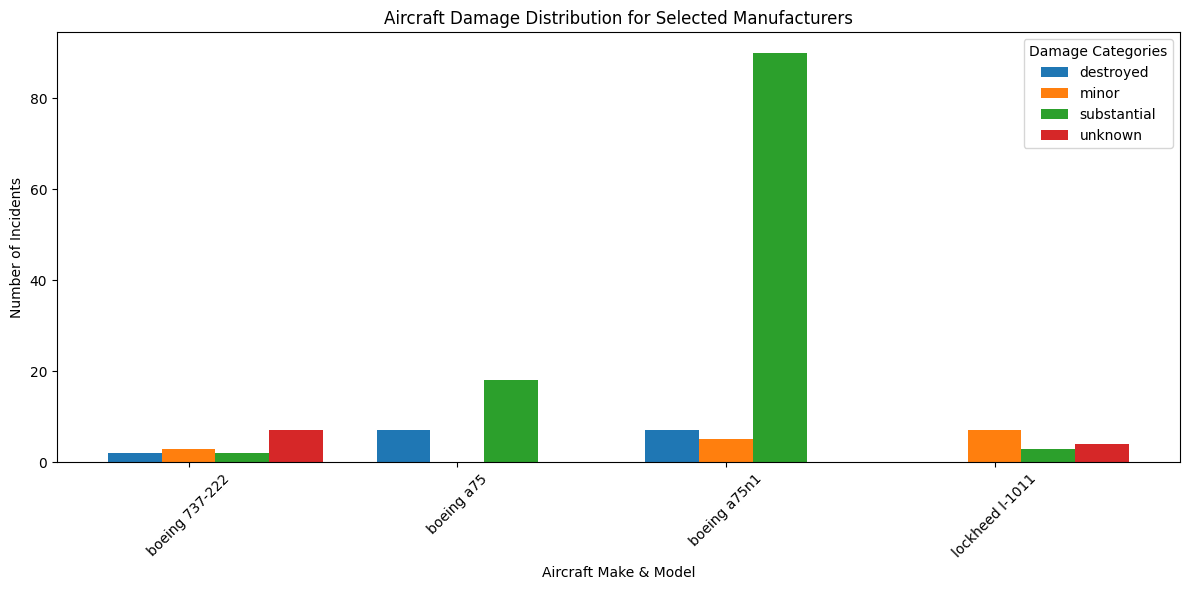

In [316]:
import pandas as pd
import matplotlib.pyplot as plt

# Get the top 4 aircraft manufacturers
selected_makes = filtered_df2["make_model"].head(4).tolist()

# Filter dataset to include only the selected manufacturers
filtered_df = df2[df2["make_model"].isin(selected_makes)]

# Aggregate aircraft damage counts per make_model
damage_counts = filtered_df.groupby("make_model")["Aircraft_damage"].value_counts().unstack().fillna(0)

# Create figure
fig, ax = plt.subplots(figsize=(12, 6))

# Define width for grouped bars
bar_width = 0.2
positions = range(len(damage_counts.index))  # Positions for manufacturer bars

# Loop through damage categories and plot grouped bars
for i, category in enumerate(damage_counts.columns):
    ax.bar([pos + (i * bar_width) for pos in positions], damage_counts[category], bar_width, label=category)

# Set labels and title
ax.set_xticks([pos + bar_width for pos in positions])
ax.set_xticklabels(damage_counts.index, rotation=45)
ax.set_title("Aircraft Damage Distribution for Selected Manufacturers")
ax.set_xlabel("Aircraft Make & Model")
ax.set_ylabel("Number of Incidents")

# Add legend for categories
ax.legend(title="Damage Categories")

plt.tight_layout()
plt.show()




Lockheed l-1011 and boeing 737-22 has the lowest destroyed rate.


### How well are passengers protected in the event of an aircraft crash For top Aircraft Manufacturers?

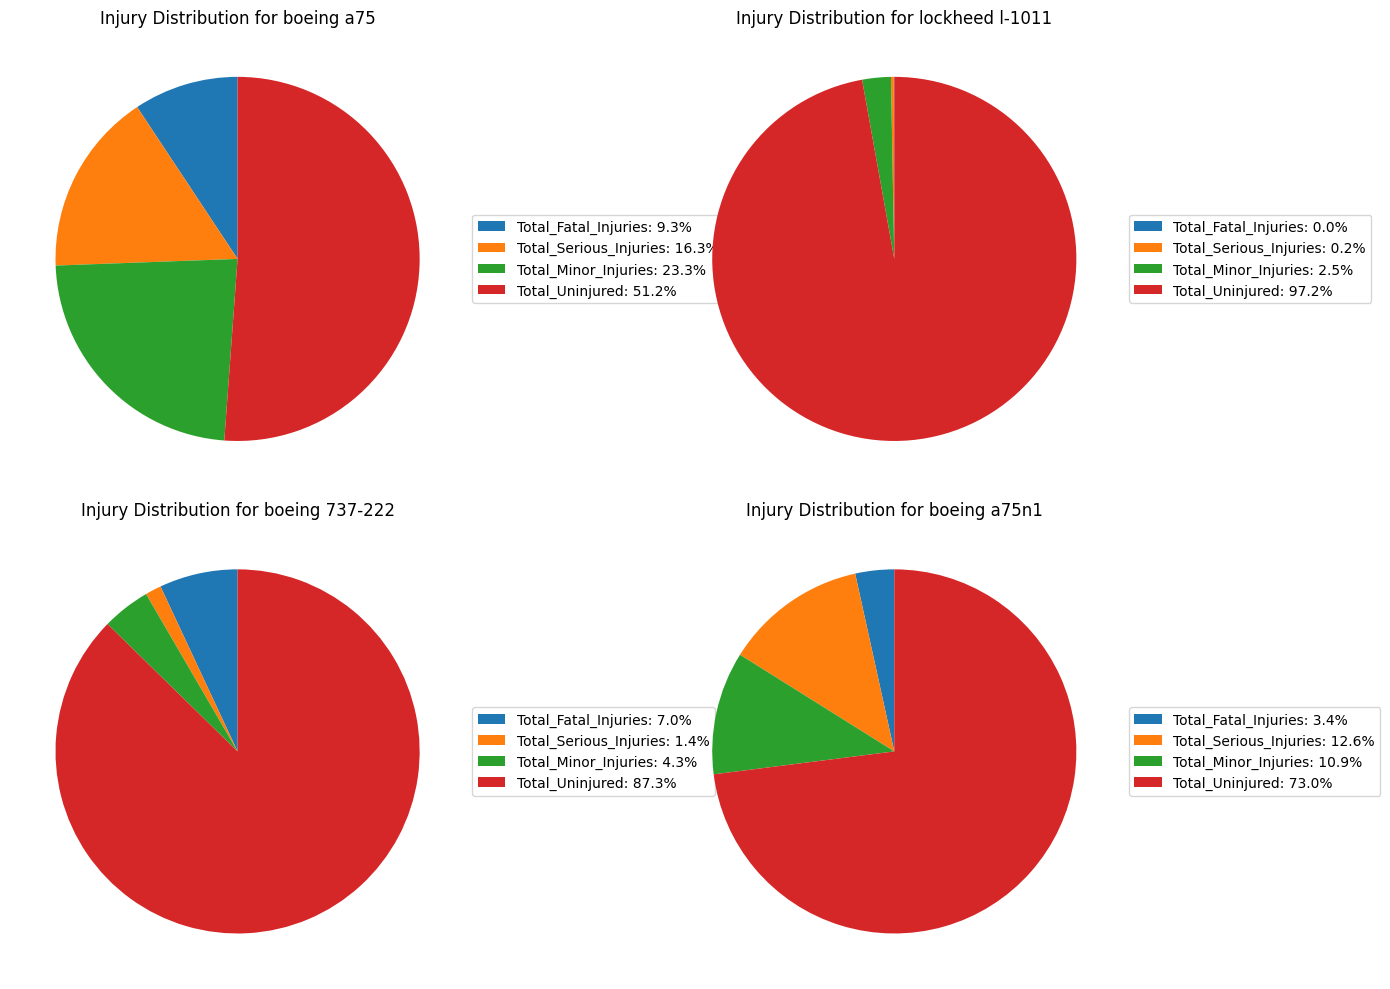

In [169]:
# Filter dataset to include only the selected manufacturers
top_makes = filtered_df

# Create figure and axes for pie charts (2 rows, 2 columns for 4 manufacturers)
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Loop through each aircraft make and generate a pie chart
for i, make in enumerate(top_makes['make_model'].unique()):
    row = i // 2  # Integer division for row
    col = i % 2   # Modulo for column

    # Filter data for the specific aircraft make
    make_data = top_makes[top_makes['make_model'] == make][['Total_Fatal_Injuries', 'Total_Serious_Injuries', 'Total_Minor_Injuries', 'Total_Uninjured']]

    # Sum injury types
    injury_counts = make_data.sum()

    # Generate pie chart **without labels on slices**
    wedges, _ = axes[row, col].pie(injury_counts, startangle=90)

    # Calculate percentage values
    percentages = [(wedge.theta2 - wedge.theta1) / 360 * 100 for wedge in wedges]
    labels_with_percentages = [f"{label}: {percentage:.1f}%" for label, percentage in zip(injury_counts.index, percentages)]

    # Add legend with percentages
    axes[row, col].legend(wedges, labels_with_percentages, loc="center left", bbox_to_anchor=(1, 0.5))

    axes[row, col].set_title(f"Injury Distribution for {make}")

# Improve layout for clarity
plt.tight_layout()











#### Analysis:
Lockheed l-101 has the highest percentage of uninjured people and the 0% fatal injuries, making it the safest among the top aircraft.

##Summary

> For this analysis, we used a dataset from Kaggle: **"Aviation Accident Database & Synopses, up to 2023."**  
After cleaning, we aimed to address key questions that the head of the aviation division is likely to have.  
> For each analysis, we found the following information:  
> - The aircraft that has sustained the fewest accidents is not necessarily the safest.  
> - Accident frequency increased from 2020 to 2022 in both Brazil and Canada.  
> - there have been far more accidents for personal flight purposes, but we shouldn't assume that this correlates directly with accident rates. Instead, should implement specific safety measures to ensure smooth operations for these flights  
> - Lockheed l-1011 and boeing 737-22 has the lowest destroyed rate.
Lockheed l-101 has the highest percentage of uninjured people and the 0% fatal injuries, making it the safest among the top aircraft.

## Data recommendations **

The head of the new aviation division may need to reconsider or conduct further research before initiating airplane operations in countries such as Canada and Mexico due to the increase in aviation accident frequency observed between 2020 and 2022.
The head of the new aviation division may need to reconsider or conduct further research before initiating airplane operations in countries such as Canada and Mexico due to the increase in aviation accident frequency observed between 2020 and 2022.

However, since the dataset is not up to date,it's not safe to assume that it is still the case for years after 2022.
The frequency of Aircraft accident for personal purpose of flight may prompt the head of the new aviation division to take specific measures of safety regarding the personal or other very recurrent flight purposes, but it should not be assumed that higher frequency directly correlates with a higher accident rate
Most accidents happen during favorable weather conditions. Regardless, Measures should be taken to avoid accidents that are directly due to bad weather condition as they account for around 8 percent.

Only by comparing accident rates instead of frequency can we determine which aircraft make could be considered the most reliable.


##Contact Information**
the dataset is not up to date. Any analysis conducted will only be representative of the approximate year range from 1982 to 2023.

- First Name: Haender Michael

- Last Name: Jean Louis

- Email: michaelhaenderjeanlouis@gmail.com

- Phone Number: +509 41 75 0264

- LinkedIn: Michael Haender Jean Louis

## Correction:

write a prompt to enduce stakeholders into asking more questions.

proportion of fatalities by phase of flights.